In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#attributes don't use () only methods
df = pd.read_csv("Contact Information (Responses) - Form Responses 1.csv")
df.head()
df.shape

(23, 19)

In [ ]:
#used to set display attributes of data frame
pd.set_option('display.max_columns',30)



In [12]:
#head or tail to view rows and can input integer in parenthesis
df


,Timestamp,Sleep,Wake,Sleep Quality,Waking Energy,Work,Focused Learning,Skill practicing,Physical Endeavors,Scrolling,jorking,Passive media,Active Media,Dominant Emotion (Less to more pleasurable),Dominant Emotion with intensity (1-10),Enhancers,how much?,MISC,System Architecture
0,6/30/2025,2:00:00 AM,11:00:00 AM,6,9,5,120,60,0,33,1,60,180,0,6,NIC,1 pouch,"Pain in left knee from run on sunday biggest ""...",20
1,7/1/2025,12:00:00 AM,6:00:00 AM,4,10,5,0,10,90,30,2,53,15,4,8,CAF,100 g,Work up goal oriented when I got sleepy took s...,40
2,7/2/2025,12:00:00 AM,6:00:00 AM,6,8,5,0,0,100,40,2,90,75,2,8,WE,100 g,Had a slight discussion with superviser but i ...,30
3,7/3/2025,5:00:00 AM,7:45:00 AM,2,4,0,60,0,0,0,2,90,180,0,10,NaN,0,Had to catch a flight lost track of time reaso...,10
4,7/4/2025,3:00:00 AM,11:30:00 AM,3,4,0,30,0,30,30,1,40,260,2,8,NaN,0,Had a headache,20
5,7/5/2025,3:00:00 AM,11:30:00 AM,2,3,0,180,0,120,40,3,120,90,3,4,"NIC, CAF",2 puches 100 grams,Helped dad implement app idea and got guitar,40
6,7/6/2025,3:00:00 AM,10:30:00 AM,3,7,0,120,50,90,30,1,5,360,3,4,NIC,1 pouch,Went to church,10
7,7/7/2025,3:00:00 AM,12:00:00 AM,3,3,0,0,10,0,60,1,60,60,3,6,NaN,0,asked for extension vacation,0
8,7/8/2025,2:00:00 AM,11:00:00 AM,3,2,0,0,20,30,60,2,120,120,3,8,NaN,0,Went to the beach,0
9,7/9/2025,6:00:00 AM,1:30:00 PM,2,2,0,40,30,0,30,5,240,45,-4,8,"ALC, NIC","two pouches, vape , 6+ drinks","""Gooned for 3 hours, man pulled up, ran home.""",20


In [6]:
energy = df['Waking Energy']
type(energy)
df.columns
# a dataframe is a container for a group of series which are just arrays

Index(['Timestamp', 'Sleep', 'Wake', 'Sleep Quality', 'Waking Energy', 'Work',
       'Focused Learning', 'Skill practicing', 'Physical Endeavors',
       'Scrolling', 'jorking', 'Passive media ', 'Active Media',
       'Dominant Emotion  (Less to more pleasurable)',
       'Dominant Emotion with intensity (1-10)', 'Enhancers', 'how much?',
       'MISC', 'System Architecture'],
      dtype='object')

In [10]:
#iloc integer location 
df.iloc[0]
#loc index location
df.loc[2]


Timestamp                                                                                7/2/2025
Sleep                                                                                 12:00:00 AM
Wake                                                                                   6:00:00 AM
Sleep Quality                                                                                   6
Waking Energy                                                                                   8
Work                                                                  8 hours pulling rose bushes
Focused Learning                                                                                0
Skill practicing                                                                                0
Physical Endeavors                                                                            100
Scrolling                                                                                      40
jorking             

In [9]:
df["jorking"].value_counts()
df.loc[2:8,'jorking']


2    2
3    2
4    1
5    3
6    1
7    1
8    2
Name: jorking, dtype: object

In [ ]:
x = df.Timestamp
y = df['Waking Energy']
z = df['Wake']
plt.plot(x,y)

In [68]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("Contact Information (Responses)6:30-7:28.csv")
# Select just the two columns of interest from your main DataFrame.
# Use .copy() to ensure it's a new, independent DataFrame.
enhancer_df = df[['Enhancers', 'how much?']].copy() 
enhancer_df['Enhancers'] = enhancer_df['Enhancers'].fillna('') 
enhancer_flags = enhancer_df['Enhancers'].str.get_dummies(sep=', ')
enhancer_df = pd.concat([enhancer_df, enhancer_flags], axis=1)

In [69]:
def extract_enhancer_quantity(row, enhancer_name):
    # If the flag for this enhancer is 0 for this row, the quantity is 0
    if row[enhancer_name] == 0:
        return 0
    
    # Get the text we need to search
    text_to_search = str(row['how much?']).lower()
    
    # --- Logic for Nicotine (NIC) ---
    if enhancer_name == 'NIC':
        # Search for a number followed by 'pouch' or 'puches'
        match = re.search(r'(\d+)\s*(pouch|puches)', text_to_search)
        if match:
            # We found the number of pouches, so we multiply it by 3 for the total mg.
            return int(match.group(1)) * 3 
        
        # If no pouches, assume "puffs" or "vape" means a qualitative amount. Let's assign it 1.
        # This part remains the same, assuming puffs don't have a direct mg equivalent here.
        if 'puff' in text_to_search or 'vape' in text_to_search:
            return 1 
            
    # --- Logic for Caffeine (CAF) ---
    if enhancer_name == 'CAF':
        # Search for a number followed by 'g' or 'mg'
        match = re.search(r'(\d+)\s*(g|mg|grams)', text_to_search)
        if match:
            return int(match.group(1)) # No change here

    # --- Logic for Alcohol (ALC) ---
    if enhancer_name == 'ALC':
        # Search for a number (with or without a +) followed by 'drinks'
        match = re.search(r'(\d+)\+?\s*drinks', text_to_search)
        if match:
            return int(match.group(1)) # No change here
            
    # If no specific pattern was found, but the flag was 1, return a default
    return 1 # Default value remains the same

enhancer_df['NIC_quantity'] = enhancer_df.apply(lambda row: extract_enhancer_quantity(row, 'NIC'), axis=1)
enhancer_df['CAF_quantity'] = enhancer_df.apply(lambda row: extract_enhancer_quantity(row, 'CAF'), axis=1)
enhancer_df['ALC_quantity'] = enhancer_df.apply(lambda row: extract_enhancer_quantity(row, 'ALC'), axis=1)

In [70]:
# Select ONLY the newly created columns from your cleaned DataFrame
new_clean_columns = enhancer_df.drop(columns=['Enhancers', 'how much?'])

# Concatenate these new columns back to your original DataFrame
# axis=1 tells pandas to align them side-by-side based on the index.
df = pd.concat([df, new_clean_columns], axis=1)

# Display the final, combined result
print("\n--- Final DataFrame with Cleaned Columns Added ---")
print(df.head())


--- Final DataFrame with Cleaned Columns Added ---
   Timestamp        Sleep         Wake  Sleep Quality  Waking Energy  Work  \
0  6/30/2025   2:00:00 AM   6:00:00 AM              6              9     5   
1   7/1/2025  12:00:00 AM   6:00:00 AM              4             10     5   
2   7/2/2025  12:00:00 AM   6:00:00 AM              6              8     5   
3   7/3/2025   5:00:00 AM   7:45:00 AM              2              4     0   
4   7/4/2025   3:00:00 AM  11:30:00 AM              3              4     0   

   Focused Learning  Skill practicing  Physical Endeavors  Scrolling  jorking  \
0               120                60                   0         33        1   
1                 0                10                  90         30        2   
2                 0                 0                 100         40        2   
3                60                 0                   0          0        2   
4                30                 0                  30         30      

In [71]:
pd.set_option('display.max_columns',30)


# --- Step 1: Rename the columns with long names ---

# We provide a dictionary to the .rename() method
# The format is { 'old_name': 'new_name', ... }
df = df.rename(columns={
    'Dominant Emotion (Less to more pleasurable)': 'Dominant Emotion',
    'Dominant Emotion with intensity (1-10)': 'Emotional Intensity'
})

# --- Step 2: Define the list of columns you want to remove ---

# This includes the original messy columns and the now-redundant flag columns.
# It's cleaner to define them in a list first.
columns_to_drop = [
    'Enhancers', 
    'how much?', 
    'ALC', 
    'CAF', 
    'NIC',
    'WE' ,
     'Dominant Emotion  (Less to more pleasurable)',
      ' Emotion with intensity (1-10)' # I saw this flag column in your screenshot, so I'm including it.
]

# --- Step 3: Drop the specified columns from the DataFrame ---

# The .drop() method removes the columns.
# 'axis=1' tells pandas we are dropping columns, not rows.
# 'errors='ignore'' prevents an error if a column name doesn't exist.
df = df.drop(columns=columns_to_drop, errors='ignore')
# This is the safe and recommended way. It preserves all data types.
df = df.loc[:, ~df.columns.duplicated()]

# --- Step 4: Verify the result ---

# Print the list of remaining columns to confirm the changes were successful.
print("DataFrame has been cleaned. The final columns are:")
print(df.columns.tolist())

DataFrame has been cleaned. The final columns are:
['Timestamp', 'Sleep', 'Wake', 'Sleep Quality', 'Waking Energy', 'Work', 'Focused Learning', 'Skill practicing', 'Physical Endeavors', 'Scrolling', 'jorking', 'Passive media ', 'Active Media', 'Emotional Intensity', 'MISC', 'System Architecture', 'L-TY', 'NIC_quantity', 'CAF_quantity', 'ALC_quantity']


In [72]:
# bed time and sleep feature engineers


# define our time stamp column considered a string as date object via to_datetime as a new column Date
df["Date"] = pd.to_datetime(df["Timestamp"],format='%m/%d/%Y')
wake_time = pd.to_datetime(df["Wake"],format='%I:%M:%S %p')
sleep_time = pd.to_datetime(df["Sleep"],format='%I:%M:%S %p')



# use mod to deal with over mid night differences so that it wraps around and gives us the actual differnce
df["hours_slept"] = ((wake_time - sleep_time).dt.seconds / 3600) % 24

# .dt to select date time object .hour for 0-23 .seconds for 0-59 etc
df["bedtime_hour"] = sleep_time.dt.hour 
df["wake_hour"] = wake_time.dt.hour


# First, make sure you have a 'Date' column that is a datetime object
# If your date column is a string, convert it:
# df['Date'] = pd.to_datetime(df['Date_Column_Name'])



# Then sort the entire DataFrame by that date which allows drops originaly indexes
df = df.sort_values(by='Date').reset_index(drop=True)
# Calculate the 4-day moving average of bedtime_hour, rolling is the arg for selecting the window .mean() the operation also use .var() for variance
#df['average_bedtime'] = df['bedtime_hour'].rolling(window=4).mean()
# same
df['Waking_Energy_Yesterday'] = df['Waking Energy'].shift(1)

cutoff_hour = 12 

# Create a new column 'bedtime_hour_linear'.
# If bedtime_hour < 12, add 24 to it. Otherwise, keep the original hour.
df['bedtime_hour_linear'] = df['bedtime_hour'].apply(lambda hour: hour + 24 if hour < cutoff_hour else hour)
df['bedtime_std_4_days'] = df['bedtime_hour_linear'].rolling(window=4).std()

# Create a boolean Series (True for weekends, False for weekdays)
# and convert it to integers (True=1, False=0).
df['Weekend_Flag'] = (df['Date'].dt.dayofweek >= 5).astype(int)


In [ ]:
# Create the correlation matrix
corr_matrix = df.corr(numeric_only=True)


# Create a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Draw the heatmap, applying the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Daily Log Data', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# --- Recommended Method: Plotting Categories Separately ---

# 1. Define your data
x = df['Waking_Energy_Yesterday']
y = df['Waking Energy']

# 2. Create filters for weekdays and weekends
is_weekend = df['Weekend_Flag'] == 1
is_weekday = df['Weekend_Flag'] == 0

# 3. Create the plot object
plt.figure(figsize=(10, 6))

# 4. Plot the two groups separately on the same axes
#    The 'label' argument is the key for the legend.
plt.scatter(x[is_weekday], y[is_weekday], color='blue', alpha=0.7, label='Weekday')
plt.scatter(x[is_weekend], y[is_weekend], color='red', alpha=0.7, label='Weekend')

# 5. Add labels and a title for clarity
plt.title("Today's Waking Energy vs. Yesterday's")
plt.xlabel("Yesterday's Waking Energy")
plt.ylabel("Today's Waking Energy")

# 6. Call plt.legend() to display the legend automatically
plt.legend()

# 7. Show the plot
plt.show()

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --- Select only the numerical columns for PCA ---
# Create a list of all columns that are numeric and you want to include
numerical_cols = df.select_dtypes(include=np.number).columns

# It's good practice to drop ID-like columns or flags that you'll use for coloring later
numerical_cols = numerical_cols.drop('Weekend_Flag') 

# Create a new DataFrame with only these numerical columns
df_numerical = df[numerical_cols].dropna()

# --- Standardize the Data ---
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
# This calculates the mean and std dev for each column and applies the transformation
X_scaled = scaler.fit_transform(df_numerical)

In [75]:
# --- Execute PCA ---
# Initialize PCA and ask for 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled data and transform it into the new component space
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
# This makes it easier to work with and plot
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

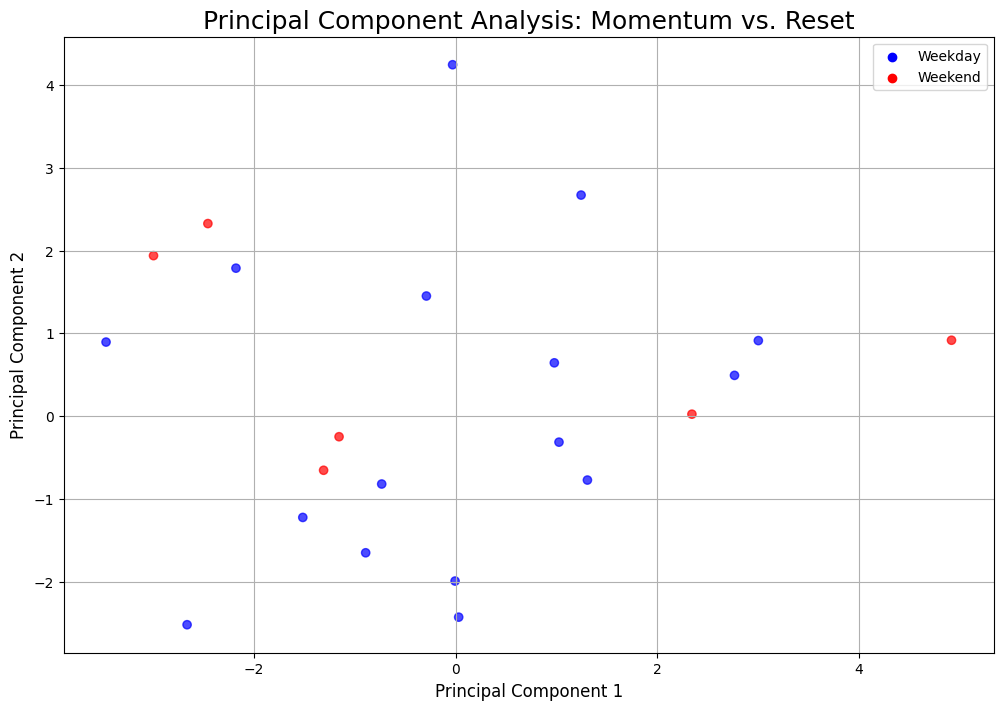

In [76]:
# --- Generate the Master Visualization (Corrected) ---

# Add the Weekend_Flag to our PCA DataFrame
df_pca['Weekend_Flag'] = df.loc[df_numerical.index, 'Weekend_Flag']

# --- THIS IS THE KEY FIX ---
# Before plotting, explicitly drop any rows from the PCA DataFrame where the Weekend_Flag is missing.
# This ensures perfect alignment between your data points and your colors.
df_plot = df_pca.dropna(subset=['Weekend_Flag'])


# Create the scatter plot
plt.figure(figsize=(12, 8))

# Define colors and labels
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Weekday', 1: 'Weekend'}

# Plot the cleaned data
# Now, df_plot does not contain any NaNs that would cause an error.
plt.scatter(
    df_plot['Principal Component 1'], 
    df_plot['Principal Component 2'], 
    c=df_plot['Weekend_Flag'].map(colors),
    alpha=0.7
)

# Create a legend
for flag_value, label in labels.items():
    plt.scatter([], [], c=colors[flag_value], label=label)

plt.title('Principal Component Analysis: Momentum vs. Reset', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- Extract and Interpret Component Loadings ---

# The loadings are stored in pca.components_
# The shape will be (n_components, n_features)
loadings = pca.components_

# Create a DataFrame to make it easy to see which variables contribute to which component
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=numerical_cols)

# Sort by the absolute value of the loadings to see the biggest contributors
pc1_loadings = loadings_df.sort_values(by='PC1', ascending=False)
pc2_loadings = loadings_df.sort_values(by='PC2', ascending=False)

print("--- Loadings for Principal Component 1 ---")
print(pc1_loadings['PC1'])
print("\n--- Loadings for Principal Component 2 ---")
print(pc2_loadings['PC2'])

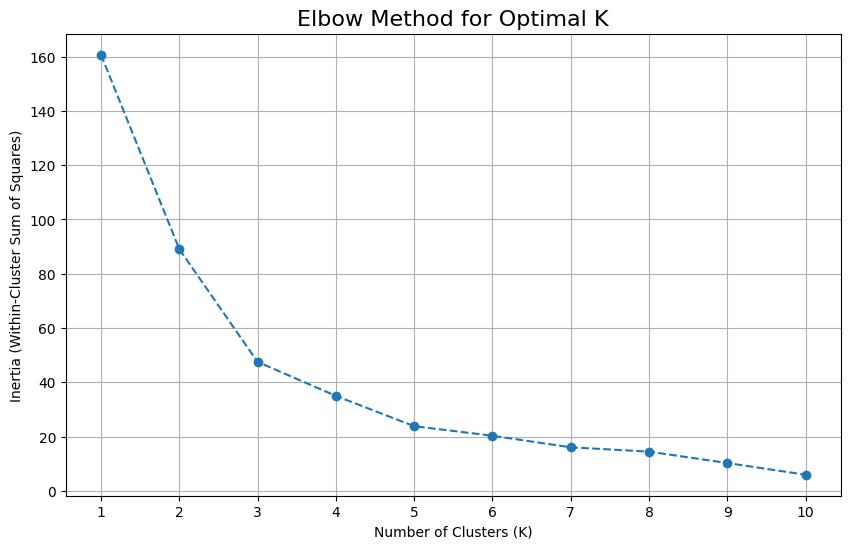

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Ensure you are using the clean PCA data from the previous step ---
# This DataFrame should have 'Principal Component 1' and 'Principal Component 2'
# and already have NaN values dropped.
# Let's assume it's called 'df_plot' from our last step.
# If not, re-create it:
df_plot = df_pca.dropna(subset=['Weekend_Flag', 'Principal Component 1', 'Principal Component 2']).copy()
X_for_clustering = df_plot[['Principal Component 1', 'Principal Component 2']]

# --- The Elbow Method ---
inertia_values = []
k_range = range(1, 11)  # We will test K from 1 to 10

for k in k_range:
    # Initialize and fit the K-Means model for the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_for_clustering)
    # Append the inertia (within-cluster sum of squares) to our list
    inertia_values.append(kmeans.inertia_)

# --- Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

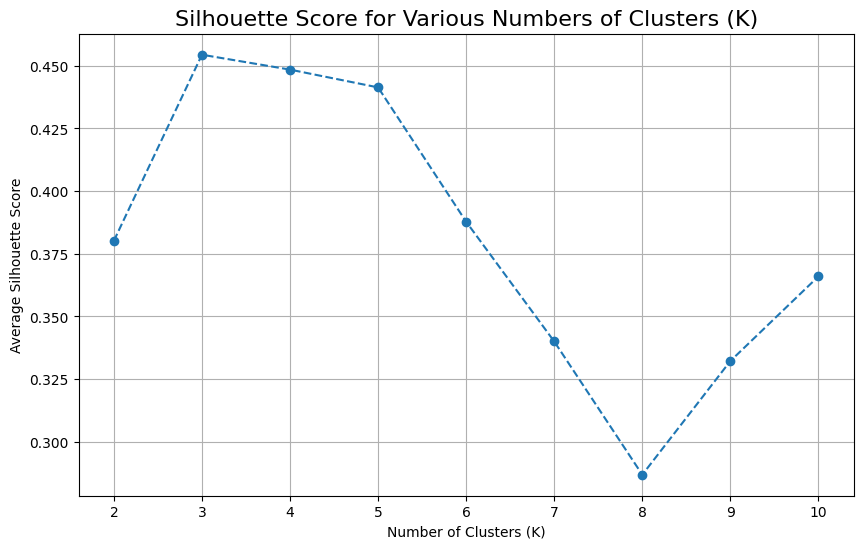


The optimal K based on the Silhouette Score is: 3
The highest average silhouette score is: 0.4544


In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- Ensure you are using the clean PCA data ---
# This DataFrame should have 'Principal Component 1' and 'Principal Component 2'
# and already have NaN values dropped.
# Let's assume it's called 'df_plot' from our last step.
X_for_clustering = df_plot[['Principal Component 1', 'Principal Component 2']]

# --- Silhouette Analysis ---
silhouette_scores = []
# Note: The silhouette score is only defined for n_clusters >= 2.
k_range = range(2, 11) 

for k in k_range:
    # Initialize and fit the K-Means model for the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_for_clustering)
    
    # Get the cluster labels for each data point
    labels = kmeans.labels_
    
    # Calculate the average silhouette score and append it to our list
    score = silhouette_score(X_for_clustering, labels)
    silhouette_scores.append(score)

# --- Plot the Silhouette Scores ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Various Numbers of Clusters (K)', fontsize=16)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --- Programmatically Find and Print the Optimal K ---
# The optimal K is the one with the highest silhouette score
optimal_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]

print(f"\nThe optimal K based on the Silhouette Score is: {optimal_k_silhouette}")
print(f"The highest average silhouette score is: {max(silhouette_scores):.4f}")

In [94]:
# --- Run Final K-Means with Optimal K ---

# Let's assume your optimal K from the elbow plot is 3
optimal_k = 3

# Initialize and fit the final K-Means model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
final_kmeans.fit(X_for_clustering)

# Get the cluster labels for each data point
cluster_labels = final_kmeans.labels_

# Add the new cluster labels to your plotting DataFrame
df_plot['Cluster'] = cluster_labels

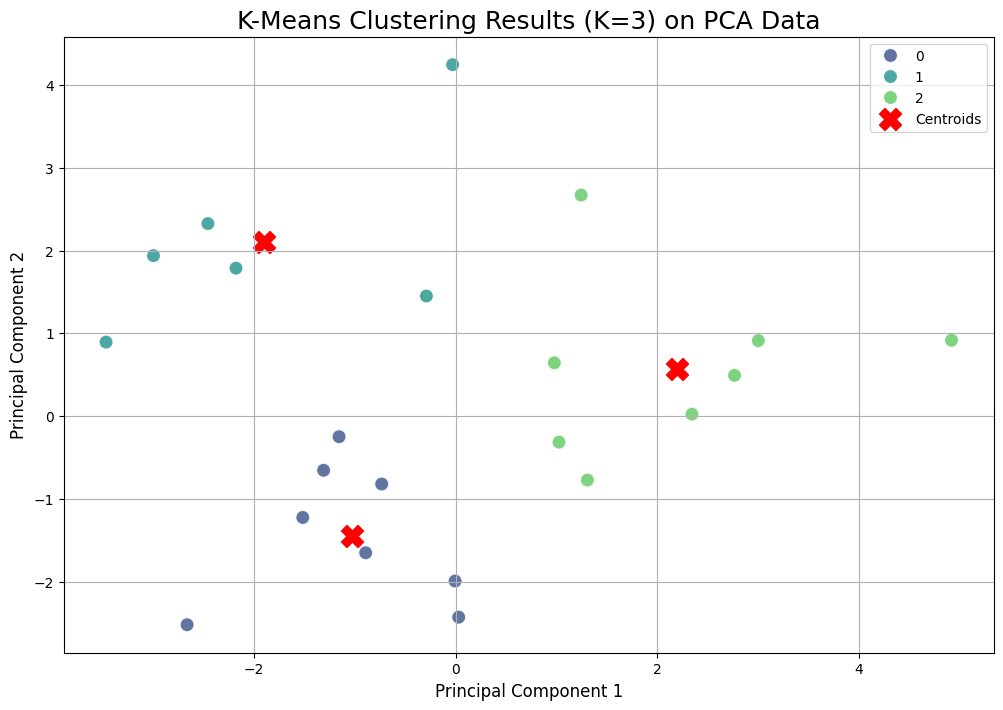

Cluster                           0           1           2
Sleep Quality              3.625000    3.000000    3.250000
Waking Energy              5.375000    3.833333    3.250000
Work                       1.250000    0.500000    0.500000
Focused Learning          77.500000   48.333333   65.000000
Skill practicing          23.125000   64.166667   23.750000
Physical Endeavors         6.250000   15.000000   30.000000
Scrolling                 38.750000   36.666667   38.750000
jorking                    1.875000    1.333333    2.500000
Passive media            135.625000  101.000000  116.875000
Active Media             110.500000   73.000000  101.875000
Emotional Intensity        6.875000    4.666667    6.500000
System Architecture       53.750000  108.333333   25.250000
L-TY                       0.000000    0.000000    0.000000
NIC_quantity               0.625000    1.000000    2.125000
CAF_quantity              62.500000   16.666667   37.500000
ALC_quantity               0.125000    0

In [95]:
# --- Generate the Definitive Visualization ---
plt.figure(figsize=(12, 8))

# Use a color palette for better visual distinction between clusters
palette = sns.color_palette('viridis', n_colors=optimal_k)

# Create a scatter plot, coloring points by their assigned 'Cluster'
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',        # Color by the new 'Cluster' column
    data=df_plot,
    palette=palette,
    s=100,                # Make the points a bit larger
    alpha=0.8
)

# Plot the centroids of the clusters
centroids = final_kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red',              # Color centroids in red
    s=250,                # Make centroids larger
    marker='X',           # Use an 'X' marker
    label='Centroids'
)

plt.title(f'K-Means Clustering Results (K={optimal_k}) on PCA Data', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- Optional: Analyze the Clusters ---
# See the average characteristics of each cluster
cluster_analysis = df.loc[df_plot.index].join(df_plot['Cluster'])
# Use numeric_only=True to tell pandas to ignore non-numeric columns
print(cluster_analysis.groupby('Cluster').mean(numeric_only=True).T)